In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

rent_path = "Raw_Data_VL/Clean_rent.csv"
rent_data = pd.read_csv(rent_path)

per_cap_data = pd.read_excel("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/Project-1/Raw_Data_VL/per_cap_income.xlsx", 
                       sheet_name= "Sheet1", keep_default_na=False, index_col=False)
#per_cap_data = pd.read_csv(per_cap_path)

#rent_data.head()
per_cap_data.head()

In [ ]:
#remove ATL from per cap
filter_df = per_cap_data.loc[(per_cap_data["Metropolitan"] == "Sacramento") |
                            (per_cap_data["Metropolitan"] == "Austin"),:]
filter_df

In [ ]:
#merge dataframes

complete_data_results = pd.merge(filter_df, rent_data, how="left", on="Metropolitan")
# Display the data table for preview

complete_data_results.reset_index(inplace = True)

complete_data_results.drop('Unnamed: 0', axis=1, inplace=True)
complete_data_results.head()


In [ ]:
#list(complete_data_results.columns)

In [ ]:
#reorder columns
#current data set shows average rent per month maybe add a new column showing average rent per year based on 
#montly avg and compare per year

In [ ]:
#complete_data_results.to_csv("Raw_Data_VL/rent_percap_merge.csv")

In [94]:
# Remove column name 'A'
#complete_data_results.reset_index(inplace = True)

complete_data_results.rename(columns = {'Per capita personal income1_Dollars_2019':'Personal Income 2019', 
                                        'Per capita personal income1_Dollars_2020':'Personal Income 2020',
                                        'Per capita personal income1_Dollars_2021':'Personal Income 2021'}, inplace = True)

complete_data_results.head()

index Metropolitan  Personal Income 2019  Personal Income 2020  \
0      0       Austin              63871.50             65609.000   
1      1   Sacramento              57768.75             63128.125   

   Personal Income 2021 State  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
0             72319.500    TX    1453.997604    1454.412674    1636.725076   
1             67691.875    CA    1636.942532    1721.861460    1901.530077   

   Avg Rent 2022  
0    1858.342581  
1    2055.795276

In [95]:
df_reset = complete_data_results.set_index('State')
df_reset.drop('index', axis=1, inplace=True)
df_reset

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin              63871.50             65609.000   
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                72319.500    1453.997604    1454.412674    1636.725076   
CA                67691.875    1636.942532    1721.861460    1901.530077   

       Avg Rent 2022  
State                 
TX       1858.342581  
CA       2055.795276

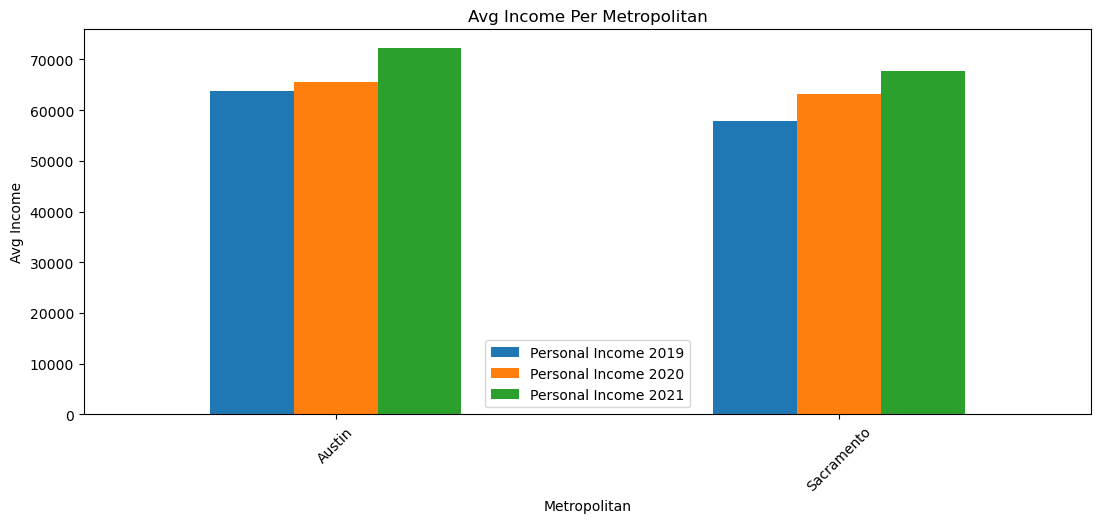

In [96]:
#trans pose
#tx_vs_2019 = df_reset.groupby(['Metropolitan'])['Personal Income 2019','Avg Rent 2019']#['Avg Rent 2019']
#inceome per metro clean 

df_income = df_reset[['Metropolitan','Personal Income 2019','Personal Income 2020','Personal Income 2021']]#.groupby('Metropolitan')
df_income

pandas_bar_plot = df_income.plot(kind="bar",figsize=(13,5))

pandas_bar_plot.set_xticklabels(df_income["Metropolitan"], rotation=45)

plt.title("Avg Income Per Metropolitan")
plt.xlabel("Metropolitan")
plt.ylabel("Avg Income")
plt.show()
#y_axis = (complete_data_results.groupby(["Drug Regimen"]).count()["Mouse ID"])

In [97]:
df_reset.columns

Index(['Metropolitan', 'Personal Income 2019', 'Personal Income 2020',
       'Personal Income 2021', 'Avg Rent 2019', 'Avg Rent 2020',
       'Avg Rent 2021', 'Avg Rent 2022'],
      dtype='object')

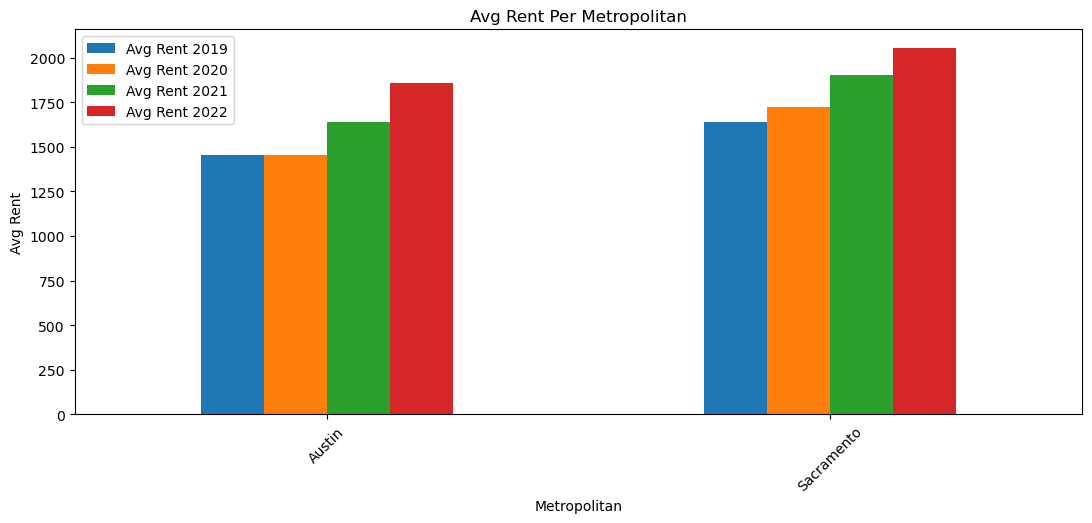

In [99]:
#rent per metro clean 

df_rent = df_reset[['Metropolitan','Avg Rent 2019', 'Avg Rent 2020',
           'Avg Rent 2021', 'Avg Rent 2022']]#.groupby('Metropolitan')
df_rent

pandas_bar_plot = df_rent.plot(kind="bar",figsize=(13,5))

pandas_bar_plot.set_xticklabels(df_rent["Metropolitan"], rotation=45)

plt.title("Avg Rent Per Metropolitan")
plt.xlabel("Metropolitan")
plt.ylabel("Avg Rent")
plt.show()

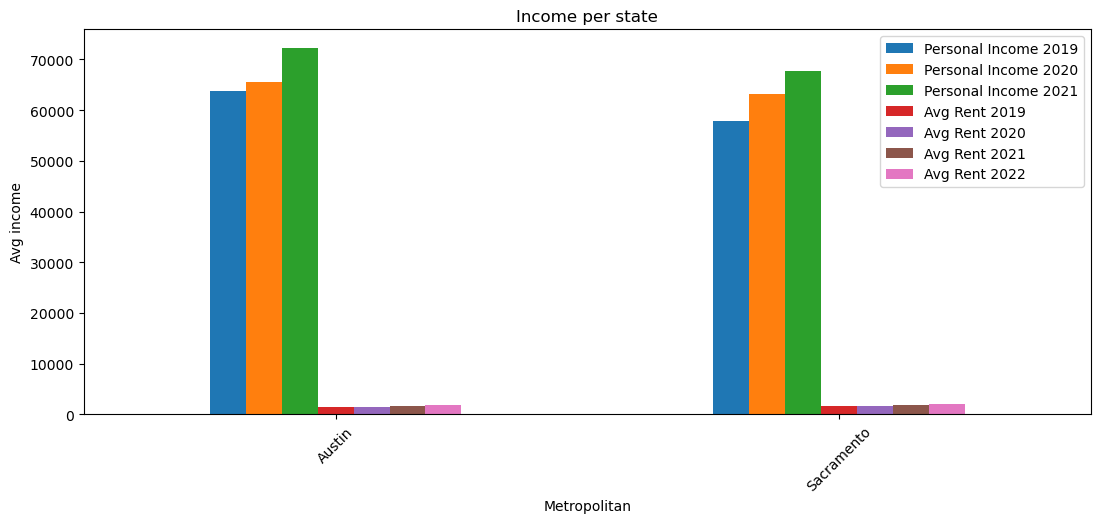

In [90]:
#compare view
pandas_bar_plot = df_reset.plot(kind="bar",figsize=(13,5))

pandas_bar_plot.set_xticklabels(df_reset["Metropolitan"], rotation=45)

plt.title("Income per state")
plt.xlabel("Metropolitan")
plt.ylabel("Avg income")
plt.show()
